In [153]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
 
hr = pd.read_csv('House_Rent.csv')

hr.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [154]:
hr.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [155]:
hr.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [156]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [157]:
hr.shape

(4746, 12)

In [158]:
hr.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [159]:
hr.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [160]:
hr.drop(['Posted On',], axis=1, inplace=True)

<Axes: ylabel='Size'>

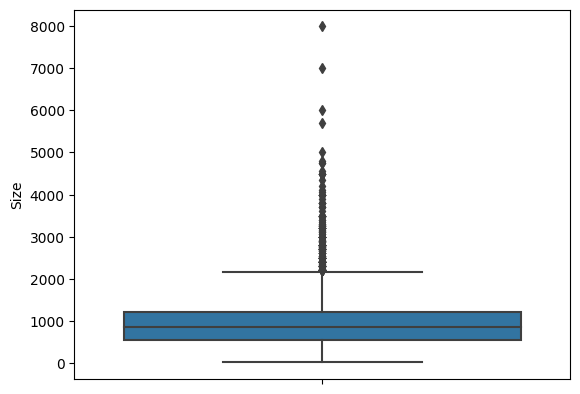

In [161]:
sns.boxplot(data=hr,y='Size')

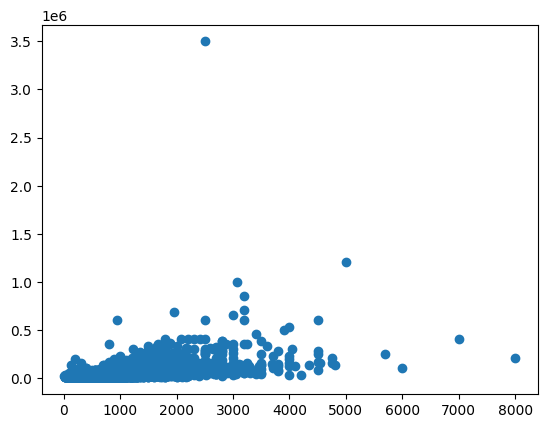

In [162]:
plt.scatter(hr['Size'],hr['Rent'])

<Axes: xlabel='City', ylabel='Rent'>

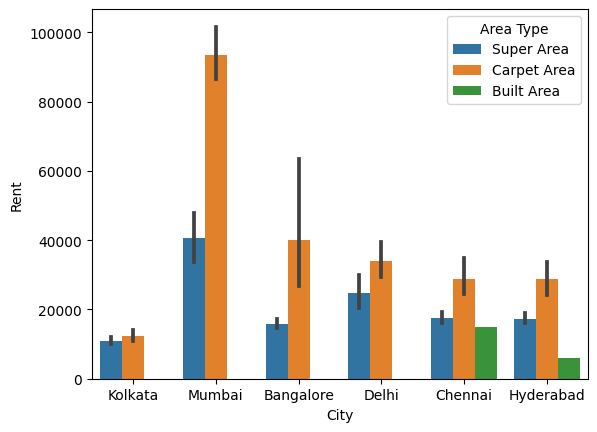

In [163]:
sns.barplot(data=hr,x='City',y='Rent',hue='Area Type')

<Axes: xlabel='Area Type', ylabel='Rent'>

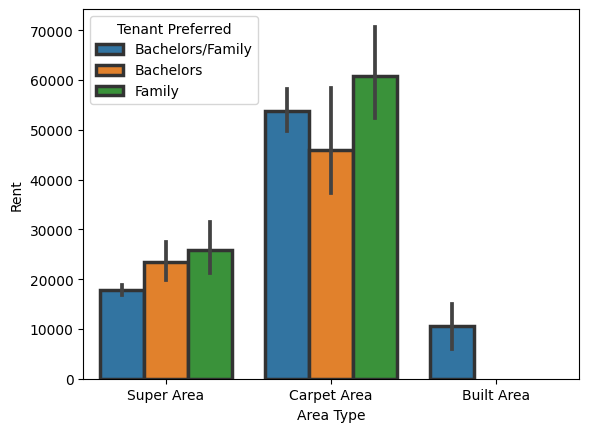

In [164]:
sns.barplot(data=hr,x='Area Type',y='Rent',hue='Tenant Preferred',linewidth=2.5,edgecolor=".2")

<Axes: xlabel='Size', ylabel='Count'>

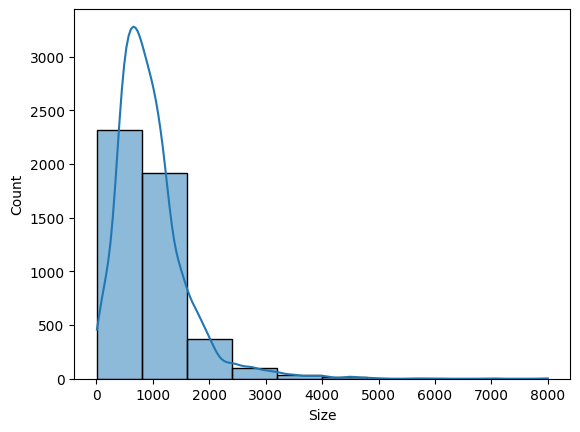

In [165]:
sns.histplot(data=hr,x='Size',bins=10,kde=True)

In [166]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = hr['Rent'].quantile(0.25)
Q3 = hr['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(hr['Rent']>=upper)[0]
lower_array = np.where(hr['Rent']<=lower)[0]
 
# Removing the outliers
hr.drop(index=upper_array, inplace=True)
hr.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", hr.shape)

New Shape:  (4226, 11)


In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hr['Rent'] = scaler.fit_transform(hr[['Rent']])
hr['Size'] = scaler.fit_transform(hr[['Size']])


c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


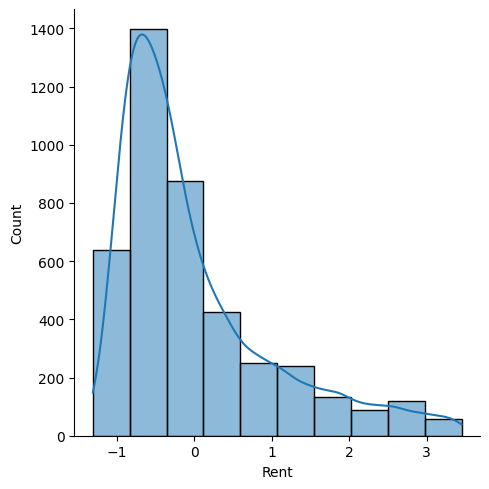

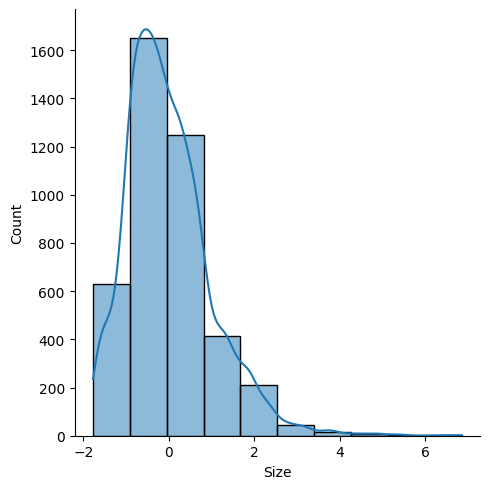

In [168]:
sns.displot(hr['Rent'],bins=10,kde=True)
sns.displot(hr['Size'],bins=10,kde=True)

In [169]:
hr.shape

(4226, 11)

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hr['Area Type'] = le.fit_transform(hr['Area Type'])
hr['Tenant Preferred'] = le.fit_transform(hr['Tenant Preferred'])
hr['Furnishing Status'] = le.fit_transform(hr['Furnishing Status'])


In [171]:
hr.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,-0.671754,0.469859,Ground out of 2,2,Bandel,Kolkata,2,1,2,Contact Owner
1,2,0.051638,-0.147778,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,1,1,Contact Owner
2,2,-0.165379,0.263980,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,1,1,Contact Owner
3,2,-0.671754,-0.147778,1 out of 2,2,Dumdum Park,Kolkata,2,1,1,Contact Owner
4,2,-0.852602,-0.044839,1 out of 2,1,South Dum Dum,Kolkata,2,0,1,Contact Owner


In [172]:
hr.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,-0.671754,0.469859,Ground out of 2,2,Bandel,Kolkata,2,1,2,Contact Owner
1,2,0.051638,-0.147778,1 out of 3,2,"Phool Bagan, Kankurgachi",Kolkata,1,1,1,Contact Owner
2,2,-0.165379,0.263980,1 out of 3,2,Salt Lake City Sector 2,Kolkata,1,1,1,Contact Owner
3,2,-0.671754,-0.147778,1 out of 2,2,Dumdum Park,Kolkata,2,1,1,Contact Owner
4,2,-0.852602,-0.044839,1 out of 2,1,South Dum Dum,Kolkata,2,0,1,Contact Owner


In [178]:
x = [['Rent','Size','Area Type','Furnishing Status']]
y = ['Tenant Preferred']

In [183]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(x,y)

ValueError: could not convert string to float: 'Rent'